<a href="https://colab.research.google.com/github/sivannavis/NLP-for-human-rights/blob/main/WordEmbed_for_10k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Read in 10k dataset demonstration
Previous code in DEI-10k

In [1]:
import pandas as pd
import itertools
import spacy
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

# import chart_studio
# import chart_studio.plotly as py
# import chart_studio.tools as tls
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

from tqdm.notebook import tqdm_notebook
from tqdm import  tqdm
tqdm_notebook.pandas(desc="progress bar")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Connecting to working directory and read in 10k data for a specific year

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# for specific years
selected_year = '2020'

In [6]:
# working directory
%cd "/content/gdrive/MyDrive/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed"
!pwd

/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed
/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed


In [7]:
dir_10ks = '10ks_para_sics/'
file_name_prefix_10ks = dir_10ks + '10ks_para_sics_'

df_selected_year_10ks = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv')

# read with row limits
# df_selected_year_10ks = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = 100)


In [8]:
df_selected_year_10ks.shape

(2017623, 4)

In [9]:

df_selected_year_10ks.head()

id ticker_display  \
0  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
1  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
2  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
3  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
4  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   

  primary_industry_id                                               text  
0               HC-BP  Indicate by check mark whether the registrant:...  
1               HC-BP  Indicate by check mark whether the registrant ...  
2               HC-BP  Indicate by check mark whether the registrant ...  
3               HC-BP  This Annual Report on Form 10-K contains forwa...  
4               HC-BP  In some cases you can identify forward-looking...

## **Demonstration of duplication dropping process (ignored for samples)**

In [8]:
# Create 10k column to drop duplicate paragraphs at the 10k level
df_selected_year_10ks['10K_id'] = df_selected_year_10ks.apply(lambda row: row['id'].rsplit('_', 1)[0], axis=1)

KeyboardInterrupt: ignored

In [ ]:
df_selected_year_10ks_deduped = df_selected_year_10ks.drop_duplicates(subset=['10K_id', 'text'], keep='first')

In [ ]:
df_selected_year_10ks_deduped.drop(['10K_id'], inplace=True, axis=1)

In [ ]:
df_selected_year_10ks_deduped.shape
df_selected_year_10ks_deduped.head()

In [ ]:
selected_year_10ks_dir = f'{selected_year}_DEI_10ks'

In [ ]:
os.mkdir(selected_year_10ks_dir)

In [ ]:
df_selected_year_10ks_deduped.to_csv(f'{selected_year_10ks_dir}/{selected_year}_10ks_deduped.csv.gz', compression='gzip', index=False)

In [ ]:
del df_selected_year_10ks_deduped
del df_selected_year_10ks

# Embedding 1.0 - skip gram with unigram tonkenizers

## data preprocessing

### sampling and dropping duplicates

In [9]:
# 1000-sample example
# for specific years
selected_year = '2020'
# read with row limits
sample = 1000
# df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample, usecols = [3])
df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample)
print(df_selected_year_10ks_sample.shape)


(1000, 4)


In [14]:
# drop duplicates
df_selected_year_10ks_sample['10K_id'] = df_selected_year_10ks_sample.apply(lambda row: row['id'].rsplit('_', 1)[0], axis=1)
df_selected_year_10ks_sample_deduped = df_selected_year_10ks_sample.drop_duplicates(subset=['10K_id', 'text'], keep='first')
df_selected_year_10ks_sample_deduped.drop(['10K_id'], inplace=True, axis=1)
print(df_selected_year_10ks_sample_deduped.shape)

# save to files
selected_year_10ks_sample_dir = f'{selected_year}_DEI_10ks'
# os.mkdir(selected_year_10ks_sample_dir)
df_selected_year_10ks_sample_deduped.to_csv(f'{selected_year_10ks_sample_dir}/{selected_year}_10ks_sample_deduped.csv.gz', compression='gzip', index=False)

(979, 4)


In [16]:
df_selected_year_10ks_sample_deduped.head()

id ticker_display  \
0  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
1  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
2  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
3  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
4  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   

  primary_industry_id                                               text  
0               HC-BP  Indicate by check mark whether the registrant:...  
1               HC-BP  Indicate by check mark whether the registrant ...  
2               HC-BP  Indicate by check mark whether the registrant ...  
3               HC-BP  This Annual Report on Form 10-K contains forwa...  
4               HC-BP  In some cases you can identify forward-looking...

### tokenizers(unigram)
text to sentense runtime: ~4s

In [60]:


import pandas as pd
import os
from nltk.corpus import stopwords
import nltk.data
import logging
import numpy as np
from gensim.models import Word2Vec
from gensim.models import fasttext


In [61]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def text_to_wordlist( text, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    text = BeautifulSoup(text).get_text()
    #  
    # 2. Remove non-letters
    text = re.sub("[^a-zA-Z]"," ", text)
    #
    # 3. Convert words to lower case and split them
    words = text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words(" "))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [62]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
nltk.download("popular")   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def text_to_sentences( text, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(text.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( text_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [63]:
sentences = []  # Initialize an empty list of sentences

# print(df_selected_year_10ks_sample)
print ("Parsing sentences from training set")
for text in df_selected_year_10ks_sample_deduped['text']:
    print(text)
    sentences += text_to_sentences(text, tokenizer)

Parsing sentences from training set
Indicate by check mark whether the registrant: (1) has filed all reports required to be filed by Section 13 or 15(d) of the Securities Exchange Act of 1934 during the preceding 12 months (or for such shorter period that the registrant was required to file such reports) and (2) has been subject to such filing requirements for the past 90 days.    Yes  ☒    No  ☐
Indicate by check mark whether the registrant has submitted electronically every Interactive Data File required to be submitted pursuant to Rule 405 of Regulation S-T (§ 232.405 of this chapter) during the preceding 12 months (or for such shorter period that the registrant was required to submit such files).    Yes  ☒    No  ☐
Indicate by check mark whether the registrant is a large accelerated filer an accelerated filer a non-accelerated filer a smaller reporting company or an emerging growth company. See the definitions of the "large accelerated filer" "accelerated filer" "smaller reporting 

In [64]:
# check sentences
print(len(sentences))
print(sentences[0])

3999
['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days']


## Training Word2Vec model

In [65]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")

# Using default architecture: skip-gram
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2022-03-24 13:18:01,887 : INFO : collecting all words and their counts
2022-03-24 13:18:01,888 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-24 13:18:01,919 : INFO : collected 5545 word types from a corpus of 123921 raw words and 3999 sentences
2022-03-24 13:18:01,921 : INFO : Loading a fresh vocabulary
2022-03-24 13:18:01,929 : INFO : effective_min_count=40 retains 512 unique words (9% of original 5545, drops 5033)
2022-03-24 13:18:01,931 : INFO : effective_min_count=40 leaves 92670 word corpus (74% of original 123921, drops 31251)
2022-03-24 13:18:01,934 : INFO : deleting the raw counts dictionary of 5545 items
2022-03-24 13:18:01,938 : INFO : sample=0.001 downsamples 53 most-common words
2022-03-24 13:18:01,941 : INFO : downsampling leaves estimated 57386 word corpus (61.9% of prior 92670)
2022-03-24 13:18:01,945 : INFO : estimated required memory for 512 words and 300 dimensions: 1484800 bytes
2022-03-24 13:18:01,946 : INFO : resetting layer wei

Training model...


2022-03-24 13:18:02,225 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-24 13:18:02,228 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-24 13:18:02,233 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-24 13:18:02,241 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-24 13:18:02,243 : INFO : EPOCH - 1 : training on 123921 raw words (57297 effective words) took 0.2s, 340718 effective words/s
2022-03-24 13:18:02,379 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-24 13:18:02,390 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-24 13:18:02,404 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-24 13:18:02,407 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-24 13:18:02,409 : INFO : EPOCH - 2 : training on 123921 raw words (57411 effective words) took 0.2s, 362081 effective words/s
2022

In [66]:
# checking model results
# model.doesnt_match("identify statements term such".split())
print(model.wv.doesnt_match("statements term such products cost".split()))
print(model.wv.most_similar("equity"))
print(model.wv.most_similar("patent"))
print(model.wv.similarity("agreement", "statements"))

term
[('investment', 0.9995008707046509), ('employees', 0.9971827864646912), ('debt', 0.996971607208252), ('control', 0.9967048168182373), ('service', 0.9965953826904297), ('sale', 0.9962947368621826), ('issued', 0.9962123036384583), ('taxable', 0.9961662888526917), ('distributions', 0.9958862066268921), ('ownership', 0.9958574771881104)]
[('such', 0.9959632158279419), ('which', 0.9896880388259888), ('patents', 0.9861694574356079), ('intellectual', 0.9850419759750366), ('claims', 0.9841432571411133), ('able', 0.983773946762085), ('if', 0.983095109462738), ('not', 0.9808897376060486), ('third', 0.9797574877738953), ('would', 0.9795460104942322)]
0.52431726


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [25]:
model.wv.most_similar(positive = ['rights', 'patent'], negative = ['properties'], topn = 10)

[('more', 0.9585977792739868),
 ('that', 0.9578635096549988),
 ('would', 0.9536533355712891),
 ('will', 0.9422581195831299),
 ('result', 0.9414169192314148),
 ('do', 0.9412647485733032),
 ('impact', 0.939698338508606),
 ('affect', 0.9393108487129211),
 ('have', 0.9353950619697571),
 ('it', 0.9340128898620605)]

In [26]:
words = model.wv.index2word
print(len(words))
print(words[:100])
print(model['financial'])
# for word in words:
    # print(word,model[word])

524
['the', 'of', 'and', 'to', 'in', 'or', 'a', 'our', 'for', 'we', 'as', 'that', 'with', 'on', 'may', 'be', 'company', 'is', 'are', 'by', 'not', 'other', 'from', 'which', 'any', 'an', 's', 'have', 'such', 'if', 'at', 'properties', 'will', 'product', 'under', 'clinical', 'could', 'lease', 'certain', 'us', 'shares', 'ser', 'including', 'development', 'financial', 'property', 'these', 'december', 'million', 'has', 'its', 'agreement', 'also', 'all', 'subject', 'this', 'products', 'costs', 'approval', 'common', 'future', 'additional', 'business', 'than', 'holdco', 'operating', 'value', 'fda', 'study', 'stock', 'term', 'candidates', 'microbiome', 'based', 'result', 'was', 'it', 'income', 'were', 'operations', 'leases', 'addition', 'rights', 'research', 'expenses', 'market', 'patent', 'statements', 'time', 'ability', 'results', 'related', 'master', 'use', 'more', 'third', 'their', 'over', 'management', 'required']
[-7.18645379e-02 -5.05775474e-02 -7.96697289e-02 -3.70738171e-02
 -4.85505722e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


# Embedding 2.0 tri-gram/bi-gram/uni-gram on skip-gram

## data preprocessing

### sampling and dropping duplicates_copy

In [10]:
# 1000-sample example
# for specific years
selected_year = '2020'
# read with row limits
sample = 1000
# df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample, usecols = [3])
df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample)
print(df_selected_year_10ks_sample.shape)


(1000, 4)


In [11]:
# drop duplicates
df_selected_year_10ks_sample['10K_id'] = df_selected_year_10ks_sample.apply(lambda row: row['id'].rsplit('_', 1)[0], axis=1)
df_selected_year_10ks_sample_deduped = df_selected_year_10ks_sample.drop_duplicates(subset=['10K_id', 'text'], keep='first')
df_selected_year_10ks_sample_deduped.drop(['10K_id'], inplace=True, axis=1)
print(df_selected_year_10ks_sample_deduped.shape)

# save to files
selected_year_10ks_sample_dir = f'{selected_year}_DEI_10ks'
# os.mkdir(selected_year_10ks_sample_dir)
df_selected_year_10ks_sample_deduped.to_csv(f'{selected_year_10ks_sample_dir}/{selected_year}_10ks_sample_deduped.csv.gz', compression='gzip', index=False)

(979, 4)


In [12]:
df_selected_year_10ks_sample_deduped.head()

id ticker_display  \
0  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
1  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
2  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
3  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
4  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   

  primary_industry_id                                               text  
0               HC-BP  Indicate by check mark whether the registrant:...  
1               HC-BP  Indicate by check mark whether the registrant ...  
2               HC-BP  Indicate by check mark whether the registrant ...  
3               HC-BP  This Annual Report on Form 10-K contains forwa...  
4               HC-BP  In some cases you can identify forward-looking...

### tokenizers(unigram)
text to sentense runtime: ~4s

In [13]:


import pandas as pd
import os
from nltk.corpus import stopwords
import nltk.data
import logging
import numpy as np
from gensim.models import Word2Vec
from gensim.models import fasttext


In [14]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def text_to_wordlist( text, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    text = BeautifulSoup(text).get_text()
    #  
    # 2. Remove non-letters
    text = re.sub("[^a-zA-Z]"," ", text)
    #
    # 3. Convert words to lower case and split them
    words = text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words(" "))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [15]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
nltk.download("popular")   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def text_to_sentences( text, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(text.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( text_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [16]:
sentences = []  # Initialize an empty list of sentences

# print(df_selected_year_10ks_sample)
print ("Parsing sentences from training set")
for text in df_selected_year_10ks_sample_deduped['text']:
    print(text)
    sentences += text_to_sentences(text, tokenizer)

Parsing sentences from training set
Indicate by check mark whether the registrant: (1) has filed all reports required to be filed by Section 13 or 15(d) of the Securities Exchange Act of 1934 during the preceding 12 months (or for such shorter period that the registrant was required to file such reports) and (2) has been subject to such filing requirements for the past 90 days.    Yes  ☒    No  ☐
Indicate by check mark whether the registrant has submitted electronically every Interactive Data File required to be submitted pursuant to Rule 405 of Regulation S-T (§ 232.405 of this chapter) during the preceding 12 months (or for such shorter period that the registrant was required to submit such files).    Yes  ☒    No  ☐
Indicate by check mark whether the registrant is a large accelerated filer an accelerated filer a non-accelerated filer a smaller reporting company or an emerging growth company. See the definitions of the "large accelerated filer" "accelerated filer" "smaller reporting 

In [17]:
# check sentences
print(len(sentences))
# print(sentences[0])
print(np.array(sentences))

3999
[list(['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days'])
 list(['yes', 'no'])
 list(['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be', 'submitted', 'pursuant', 'to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'submit', 'such', 'files'])
 ...
 list(['while', 'properties', 'under', 'the', '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


### [failed] build bi-grams < token-to-phrases-to-token method

In [27]:
from gensim.models.phrases import Phrases, Phraser
def build_phrases(sentences):
    phrases = Phrases(sentences,
                      min_count=5,
                      threshold=7,
                      progress_per=1000)
    return Phraser(phrases)

In [28]:
# build phrase model
phrases_model = build_phrases(sentences)

# save bi-gram phrase model
phrases_model.save('phrases_model.txt')
phrases_model= Phraser.load('phrases_model.txt')

2022-03-24 03:41:36,212 : INFO : collecting all words and their counts
2022-03-24 03:41:36,213 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-03-24 03:41:36,268 : INFO : PROGRESS: at sentence #1000, processed 28116 words and 17592 word types
2022-03-24 03:41:36,322 : INFO : PROGRESS: at sentence #2000, processed 57395 words and 28465 word types
2022-03-24 03:41:36,383 : INFO : PROGRESS: at sentence #3000, processed 88994 words and 39105 word types
2022-03-24 03:41:36,453 : INFO : collected 45600 word types from a corpus of 123921 words (unigram + bigrams) and 3999 sentences
2022-03-24 03:41:36,454 : INFO : using 45600 counts as vocab in Phrases<0 vocab, min_count=5, threshold=7, max_vocab_size=40000000>
2022-03-24 03:41:36,455 : INFO : source_vocab length 45600
2022-03-24 03:41:36,938 : INFO : Phraser built with 1024 phrasegrams
2022-03-24 03:41:36,943 : INFO : saving Phraser object under phrases_model.txt, separately None
2022-03-24 03:41:37,458 : INFO : sa

In [29]:
# bi-gram extraction
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

# bo-gram concatenation
def sentences_to_bi_grams(n_grams, sentences, output_file_name):
  with open(output_file_name, 'w+') as out_file:
    for sentence in sentences:
        # cleaned_sentence = clean_sentence(sentence)
        # tokenized_sentence = tokenize(cleaned_sentence)
        parsed_sentence = sentence_to_bi_grams(n_grams, sentence)
        out_file.write(parsed_sentence + '\n')

sentences_to_bi_grams(phrases_model, sentences, "sample_bigram")


# def sentences_to_bi_grams(n_grams, input_file_name, output_file_name):
#     with open(input_file_name, 'r') as input_file_pointer:
#         with open(output_file_name, 'w+') as out_file:
#             for sentence in get_sentences(input_file_pointer):
#                 cleaned_sentence = clean_sentence(sentence)
#                 tokenized_sentence = tokenize(cleaned_sentence)
#                 parsed_sentence = sentence_to_bi_grams(n_grams, tokenized_sentence)
#                 out_file.write(parsed_sentence + '\n')

####[failed here] Tokenize bigram again
runtime: ~ 60s

In [67]:
# check out bi-grams
sample_bigram = open("sample_bigram",'r').read().split()
! pwd
print(sample_bigram)
print(len(sample_bigram))
# sentences=  sample_bigram

/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed
['indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities_exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has_been', 'subject_to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days', 'yes_no', 'indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be', 'submitted', 'pursuant_to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required', 'to', 'submit

In [68]:
# Redo "sentences" tokenizers
bigram_sentences = []  # Initialize an empty list of sentences

# print(df_selected_year_10ks_sample)
print ("Parsing sentences from training set")
for text in sample_bigram:
    print(text)
    bigram_sentences += text_to_sentences(text, tokenizer)

Streaming output truncated to the last 5000 lines.
adverse_events
of
unanticipated
severity
or
frequency
problems
with
manufacturers
or
manufacturing_processes
or
failure
to_comply
with
regulatory_requirements
the
regulatory_agency
may
impose
restrictions_on
the
products
or
us
including
requiring
withdrawal
of
the
product
from
the
market
any
failure
to_comply
with
applicable
regulatory_requirements
may
yield
various
results
including
noncompliance
with
similar
eu
requirements
regarding
safety
monitoring
or
pharmacovigilance
can
also
result_in
significant
financial
penalties
similarly
failure
to_comply
with
u_s
and
foreign_regulatory
requirements
regarding
the
development
of
products
for
pediatric
populations
and
the
protection
of
personal
health_information
can
also
lead
to
significant
penalties
and
sanctions
any
government
investigation
of
alleged
violations
of
law
could_require
us
to
expend
significant
time
and
resources
in
response
and
could
generate
negative
publicity
in_addition
t

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'superseded'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Streaming output truncated to the last 5000 lines.
actively
redeveloping
space_at
our
properties
and
re_leasing
such
space
to
new
diversified
tenants
at
higher
rents
than
those
paid
for
space
currently
or
formerly
occupied_by
sears
or
kmart
prior_to
redevelopment
we
seek
to
optimize
the
mix
of
tenants
at
and
maximize
the
value
of
our
properties
by
focusing
on
growing
national
retailers
and
taking_into
account
customer
demographics
and
the
competitive
environment
of
each
property
s
market
area
we_believe
that
the
superior
real_estate
locations
diversity
of
property
types
and
national
footprint
that
characterize
our_portfolio
make
us
well
positioned
to
meet
the
store
growth
needs
of
retailers
across
a
variety
of
sectors
and
concepts
as
we
lease
space
to
such
retailers
we
aim
to
create
multi_tenant
shopping_centers
that
command
superior
rents
and
valuations
due_to
their
prime
locations
synergies
with
adjoining
retailers
and
proximity
to
productive
malls
and
shopping_centers
maximize
value

In [59]:
# check sentences
sentences = bigram_sentences
print(len(sentences))
print(sentences)

108295
[['indicate', 'by'], ['check', 'mark'], ['whether'], ['the'], ['registrant', 'has'], ['filed'], ['all'], ['reports'], ['required'], ['to'], ['be'], ['filed'], ['by'], ['section'], ['or'], ['d'], ['of'], ['the'], ['securities', 'exchange'], ['act'], ['of'], ['during'], ['the'], ['preceding', 'months'], ['or'], ['for'], ['such', 'shorter'], ['period'], ['that'], ['the'], ['registrant', 'was'], ['required'], ['to'], ['file'], ['such'], ['reports'], ['and'], ['has', 'been'], ['subject', 'to'], ['such'], ['filing'], ['requirements'], ['for'], ['the'], ['past'], ['days'], ['yes', 'no'], ['indicate', 'by'], ['check', 'mark'], ['whether'], ['the'], ['registrant', 'has'], ['submitted'], ['electronically'], ['every'], ['interactive'], ['data'], ['file'], ['required'], ['to'], ['be'], ['submitted'], ['pursuant', 'to'], ['rule'], ['of'], ['regulation'], ['s'], ['t'], ['of'], ['this'], ['chapter'], ['during'], ['the'], ['preceding', 'months'], ['or'], ['for'], ['such', 'shorter'], ['period']

### bigram tokenizers: phrases within tokenizing (**with Phraser**)

#### n-gram pipelines

In [43]:
from gensim.models.phrases import Phrases, Phraser
def build_phrases(sentences, min_count, threshold):
    phrases = Phrases(sentences,
                      min_count=min_count,
                      threshold=threshold,
                      progress_per=1000)
    return Phraser(phrases)


# build phrase model
bi_phrases_model = build_phrases(sentences, 3, 7)

# save bi-gram phrase model
bi_phrases_model.save('bi_phrases_model.txt')
bi_phrases_model= Phraser.load('bi_phrases_model.txt')


In [44]:
# bi-gram extraction
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

# bi-gram concatenation
def sentences_to_bi_grams(n_grams, tokenized_sentences, output_file_name): 
    # with open(input_file_name, 'r') as input_file_pointer: 
        with open(output_file_name, 'w+') as out_file: 
            for tokenized_sentence in tokenized_sentences: 
                # clean_sentence = clean_sentence(sentence) 
                # tokenized_sentence = tokenize(cleaned_sentence) 
                parsed_sentence = sentence_to_bi_grams(n_grams, tokenized_sentence) 
                out_file.write(parsed_sentence + '\n')

sentences_to_bi_grams(bi_phrases_model, sentences, "sample_bigram.txt")

# build bi-gram form tokenizers
bi_sentences = []
for bi_sentence in open("sample_bigram.txt").readlines():
  bi_sentences.append(bi_sentence.split())
print(bi_sentences)


[['indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'filed', 'all', 'reports', 'required_to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities_exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required_to', 'file', 'such_reports', 'and', 'has_been', 'subject_to', 'such', 'filing_requirements', 'for', 'the', 'past', 'days'], ['yes_no'], ['indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required_to', 'be_submitted', 'pursuant_to', 'rule', 'of', 'regulation_s', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required_to', 'submit', 'such', 'files'], ['yes_no'], ['indicate_by', 'check_mark', 'whether', 'the', 'registrant', 'is', 'a', 'large_accelerated', 'filer', 'an', 'accelerated_filer', 'a', 'n

In [49]:

# build trigram and four-gram phrase model
tri_phrases_model = build_phrases(bi_sentences, 3, 4)

# save tri-gram and four-gram phrase model
tri_phrases_model.save('tri_phrases_model.txt')
tri_phrases_model= Phraser.load('tri_phrases_model.txt')

In [50]:
# building tri-gram and four-gram in similar approach
sentences_to_bi_grams(tri_phrases_model, bi_sentences, "sample_trigram.txt")
tri_sentences = []
for tri_sentence in open("sample_trigram.txt").readlines():
  tri_sentences.append(tri_sentence.split())
print(tri_sentences)


[['indicate_by_check_mark', 'whether', 'the', 'registrant_has', 'filed', 'all', 'reports', 'required_to_be', 'filed', 'by_section', 'or', 'd', 'of', 'the', 'securities_exchange_act', 'of', 'during_the', 'preceding_months_or', 'for_such_shorter', 'period', 'that', 'the_registrant_was', 'required_to', 'file', 'such_reports', 'and', 'has_been_subject_to', 'such', 'filing_requirements', 'for', 'the', 'past', 'days'], ['yes_no'], ['indicate_by_check_mark', 'whether', 'the', 'registrant_has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required_to', 'be_submitted', 'pursuant_to', 'rule', 'of_regulation_s', 't', 'of', 'this', 'chapter', 'during_the', 'preceding_months_or', 'for_such_shorter', 'period', 'that', 'the_registrant_was', 'required_to_submit', 'such', 'files'], ['yes_no'], ['indicate_by_check_mark', 'whether', 'the', 'registrant', 'is', 'a_large_accelerated', 'filer', 'an', 'accelerated_filer_a', 'non', 'accelerated_filer_a', 'smaller_reporting_company', 

#### extra tests

In [51]:
# check bi-gram model
print(bi_phrases_model["people in new york go to columbia university".split()])
test_sent = "The human microbiome is one of the richest and most diverse ecosystems on earth with a population of approximately 30 – 50 trillion microorganisms that live in our intestines mouth skin and elsewhere in or on the body.".split()
# ['we', 'are', 'initially', 'focused', 'on', 'implementing', 'our', 'microbiome_therapeutics', 'platform', 'to', 'develop', 'ecobiotic_microbiome', 'therapeutics', 'that', 'treat', 'dysbiosis', 'in', 'the', 'colonic_microbiome', 'one', 'of', 'the', 'most', 'diverse', 'microbial', 'ecologies', 'in', 'the', 'human', 'body']
bi_test = bi_phrases_model[test_sent]
tri_test = tri_phrases_model[bi_test]
print(bi_test)
print(tri_test)

# bi_test = sentence_to_bi_grams(bi_phrases_model, test_sent)
# tri_test = sentence_to_bi_grams(tri_phrases_model, bi_test)
# print(bi_test)
# print(tri_test)


['people', 'in', 'new_york', 'go', 'to', 'columbia', 'university']
['The', 'human_microbiome', 'is', 'one', 'of', 'the', 'richest', 'and', 'most', 'diverse', 'ecosystems', 'on', 'earth', 'with', 'a', 'population', 'of', 'approximately', '30', '–', '50', 'trillion', 'microorganisms', 'that', 'live', 'in', 'our', 'intestines', 'mouth', 'skin', 'and', 'elsewhere', 'in', 'or', 'on', 'the', 'body.']
['The', 'human_microbiome_is', 'one', 'of', 'the', 'richest', 'and', 'most', 'diverse', 'ecosystems', 'on', 'earth', 'with', 'a', 'population', 'of', 'approximately', '30', '–', '50', 'trillion', 'microorganisms', 'that', 'live', 'in', 'our', 'intestines', 'mouth', 'skin', 'and', 'elsewhere_in', 'or', 'on', 'the', 'body.']


In [52]:


# check rows
print(len(sentences))
print(len(bi_sentences))
print(len(tri_sentences))

# check phrases of first sentence
print(sentences[0])
print(bi_sentences[0])
print(tri_sentences[0])
print(len(sentences[0]))
print(len(bi_sentences[0]))
print(len(tri_sentences[0]))
# print(sentences)

3999
3999
3999
['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days']
['indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'filed', 'all', 'reports', 'required_to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities_exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required_to', 'file', 'such_reports', 'and', 'has_been', 'subject_to', 'such', 'filing_requirements', 'for', 'the', 'past', 'days']
['indicate_by_check_mark', 'whether', 'the', 'registrant_has',

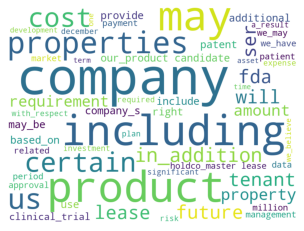

In [ ]:

from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
fig,ax=plt.subplots()

# with open(r'...\vanity fair.txt') as f:
#     text=f.read()
text = open("sample_bigram.txt").read()

mycloudword=WordCloud(width=800, 
                      height=600, 
                      scale=1, 
                      margin=2,
                      background_color='white',
                      max_words=200, 
                      min_font_size=20, 
                      max_font_size=140,
                      stopwords=STOPWORDS, 
                      random_state=50).generate(text)


ax.imshow(mycloudword)
ax.axis("off")
plt.show()

#### ngram with **NLTK**

### Tokenizing bigram and trigram with NLTK ngram

## Training Word2Vec model with bi-gram tokenizers
runtime: ~1s

In [69]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 20   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")

# Using default architecture: skip-gram
bi_model = word2vec.Word2Vec(bi_sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
bi_model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
bi_model_name = "200features_20minwords_10context_bigram"
bi_model.save(bi_model_name)

2022-03-28 04:14:55,462 : INFO : collecting all words and their counts
2022-03-28 04:14:55,465 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-28 04:14:55,491 : INFO : collected 7187 word types from a corpus of 104436 raw words and 3999 sentences
2022-03-28 04:14:55,492 : INFO : Loading a fresh vocabulary
2022-03-28 04:14:55,500 : INFO : effective_min_count=20 retains 775 unique words (10% of original 7187, drops 6412)
2022-03-28 04:14:55,504 : INFO : effective_min_count=20 leaves 74466 word corpus (71% of original 104436, drops 29970)
2022-03-28 04:14:55,511 : INFO : deleting the raw counts dictionary of 7187 items
2022-03-28 04:14:55,513 : INFO : sample=0.001 downsamples 44 most-common words
2022-03-28 04:14:55,515 : INFO : downsampling leaves estimated 46227 word corpus (62.1% of prior 74466)
2022-03-28 04:14:55,521 : INFO : estimated required memory for 775 words and 200 dimensions: 1627500 bytes
2022-03-28 04:14:55,523 : INFO : resetting layer we

Training model...


2022-03-28 04:14:55,688 : INFO : training model with 4 workers on 775 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-28 04:14:55,804 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-28 04:14:55,806 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-28 04:14:55,808 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-28 04:14:55,814 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-28 04:14:55,816 : INFO : EPOCH - 1 : training on 104436 raw words (46181 effective words) took 0.1s, 393542 effective words/s
2022-03-28 04:14:55,914 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-28 04:14:55,917 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-28 04:14:55,927 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-28 04:14:55,933 : INFO : worker thread finished; awaiting finish of 0 mo

## Tests for Bi-gram model

### unigram tasks revisit

In [70]:
# checking model results
# model.doesnt_match("identify statements term such".split())
print(bi_model.wv.doesnt_match("statements term products cost".split()))
print(bi_model.wv.most_similar("equity"))
print(bi_model.wv.most_similar("patent"))
print(bi_model.wv.similarity("agreement", "statements"))

term
[('due_to', 0.999792218208313), ('amounts', 0.9997806549072266), ('operating', 0.9997774362564087), ('but', 0.9997711181640625), ('income', 0.999763011932373), ('can', 0.9997619986534119), ('corporate', 0.9997580647468567), ('conditions', 0.9997528791427612), ('investments', 0.999748706817627), ('payments', 0.9997476935386658)]
[('made', 0.9996281862258911), ('it_is', 0.999602198600769), ('before', 0.9995973110198975), ('liability', 0.9995805025100708), ('coverage', 0.999579668045044), ('service', 0.9995537996292114), ('can', 0.9995492696762085), ('cost', 0.9995476007461548), ('whether', 0.9995436668395996), ('it', 0.9995430111885071)]
0.99640816


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [71]:
bi_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['properties'], topn = 10)

[('united_states', 0.9967228174209595),
 ('drug', 0.9965649843215942),
 ('clinical', 0.9961990714073181),
 ('after', 0.9961965680122375),
 ('disease', 0.9961912631988525),
 ('designation', 0.9960988759994507),
 ('associated_with', 0.9960062503814697),
 ('receive', 0.995975911617279),
 ('more_than', 0.9959595203399658),
 ('data', 0.9959198236465454)]

In [72]:
words = bi_model.wv.index2word
print(len(words))
print(words[:100])
print(model['financial'])
# for word in words:
    # print(word,model[word])

396
['the', 'of', 'and', 'to', 'or', 'in', 'a', 'our', 'for', 'that', 'as', 'is', 'we', 'are', 'with', 'company', 'on', 'by', 'any', 'which', 'from', 'other', 'such', 'may', 'at', 'properties', 'an', 'under', 'us', 'including', 'certain', 'be', 'not', 'ser', 'lease', 'if', 'these', 'december', 'its', 'have', 'development', 'million', 'we_may', 'products', 'fda', 'will', 'company_s', 'also', 'all', 'property', 'future', 'this', 'operations', 'in_addition', 'may_be', 'was', 'has', 'costs', 's', 'shares', 'product', 'were', 'we_have', 'their', 'subject_to', 'use', 'related', 'approval', 'could', 'additional', 'will_be', 'our_product', 'results', 'each', 'research', 'during', 'candidates', 'required', 'data', 'management', 'united_states', 'requirements', 'based_on', 'assets', 'our_business', 'time', 'more', 'one', 'study', 'period', 'terms', 'include', 'expenses', 'rights', 'sears_holdings', 'it', 'holdco_master', 'amount', 'common_shares', 'upon']
[-2.58139987e-02 -1.01507939e-01 -6.3321

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


### Bi-gram tasks

In [76]:
print(np.array(bi_sentences[:100]))

[list(['indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities_exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has_been', 'subject_to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days'])
 list(['yes_no'])
 list(['indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be', 'submitted', 'pursuant_to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required', 'to', 'submit', 'such', 'files'])
 list(['yes_no'])
 list(['indicate_by', 'check_mark', 'whether', 'the', 'registrant', 'is', 'a', 'large_acce

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [73]:
# vector comparison

bi_words = bi_model.wv.index2word
print(len(bi_words))
print(np.array(bi_words))

words = model.wv.index2word
print(len(words))
print(np.array(words))

396
['the' 'of' 'and' 'to' 'or' 'in' 'a' 'our' 'for' 'that' 'as' 'is' 'we'
 'are' 'with' 'company' 'on' 'by' 'any' 'which' 'from' 'other' 'such'
 'may' 'at' 'properties' 'an' 'under' 'us' 'including' 'certain' 'be'
 'not' 'ser' 'lease' 'if' 'these' 'december' 'its' 'have' 'development'
 'million' 'we_may' 'products' 'fda' 'will' 'company_s' 'also' 'all'
 'property' 'future' 'this' 'operations' 'in_addition' 'may_be' 'was'
 'has' 'costs' 's' 'shares' 'product' 'were' 'we_have' 'their'
 'subject_to' 'use' 'related' 'approval' 'could' 'additional' 'will_be'
 'our_product' 'results' 'each' 'research' 'during' 'candidates'
 'required' 'data' 'management' 'united_states' 'requirements' 'based_on'
 'assets' 'our_business' 'time' 'more' 'one' 'study' 'period' 'terms'
 'include' 'expenses' 'rights' 'sears_holdings' 'it' 'holdco_master'
 'amount' 'common_shares' 'upon' 'value' 'clinical' 'with_respect'
 'tenants' 'a_result' 'significant' 'market' 'leases' 'date' 'when' 'cdi'
 'received' 'applica

In [78]:
# check similarity
print(bi_model.wv.doesnt_match("financial statements terms our_product cost".split()))
print(bi_model.wv.most_similar("performance_obligation"))
print(bi_model.wv.similarity("consolidated_financial", "intellectual_property"))
bi_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['operating_partnership'], topn = 10)

our_product
[('years', 0.9997206926345825), ('over', 0.9996860027313232), ('accounting', 0.999680757522583), ('method', 0.9996769428253174), ('transaction', 0.9996553659439087), ('prior_to', 0.999649167060852), ('two', 0.9996329545974731), ('fair_value', 0.9996291399002075), ('within', 0.9996289014816284), ('contract', 0.9996263980865479)]
0.99800456


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


[('may_be', 0.9988439083099365),
 ('such', 0.9988014698028564),
 ('our_ability', 0.9984623193740845),
 ('more', 0.9984403848648071),
 ('to', 0.9984323978424072),
 ('could', 0.9984145760536194),
 ('may', 0.9983721971511841),
 ('that', 0.9983164072036743),
 ('be', 0.9982485175132751),
 ('result_in', 0.998161256313324)]

In [80]:
# check bi-gram vector

print(bi_model['financial_statements'])

[ 1.87983122e-02 -4.52784374e-02  1.78240065e-04 -6.92998767e-02
 -6.28733486e-02  8.81104358e-03 -3.46368924e-02 -1.09478250e-01
  4.85493392e-02  4.21178080e-02  1.41268820e-01  1.18060365e-01
  1.63614199e-01  9.47266293e-04 -5.43026626e-03  3.83733772e-02
  3.72898728e-02  1.96786374e-01 -2.84680147e-02 -2.58536655e-02
 -4.62494902e-02  9.78386998e-02  4.80938703e-02  7.60323089e-03
  6.29026219e-02  1.51516289e-01  1.99554209e-03 -5.19088954e-02
 -1.88240390e-02  2.88843028e-02  3.49030942e-02 -9.03798342e-02
  6.59036636e-02 -5.55185564e-02 -4.10377458e-02  2.60883681e-02
 -1.36049241e-02  6.07377067e-02  8.13206285e-02  4.79778089e-02
 -5.59574328e-02  7.11861476e-02 -2.10566055e-02  1.15797017e-02
  1.10969022e-02  9.17419232e-03 -1.19810516e-03 -1.15549276e-02
 -9.76547506e-03  9.17602628e-02  7.46617764e-02  1.97635591e-02
  4.45490610e-03  1.54439192e-02  4.68664914e-02 -5.50736226e-02
  1.35281205e-01  1.08510129e-01  1.50367886e-01 -1.33459553e-01
  6.01534285e-02  2.25527

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


## Training Word2Vec model with four-gram tokenizers
lower min_word_count because of smaller vocab
runtime: ~1s

In [59]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")

# Using default architecture: skip-gram
tri_model = word2vec.Word2Vec(tri_sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
tri_model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
tri_model_name = "200features_10minwords_10context_trigram"
tri_model.save(tri_model_name)

2022-03-28 04:09:16,772 : INFO : collecting all words and their counts
2022-03-28 04:09:16,775 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-28 04:09:16,816 : INFO : collected 8540 word types from a corpus of 89154 raw words and 3999 sentences
2022-03-28 04:09:16,822 : INFO : Loading a fresh vocabulary
2022-03-28 04:09:16,837 : INFO : effective_min_count=10 retains 1577 unique words (18% of original 8540, drops 6963)
2022-03-28 04:09:16,843 : INFO : effective_min_count=10 leaves 64980 word corpus (72% of original 89154, drops 24174)
2022-03-28 04:09:16,856 : INFO : deleting the raw counts dictionary of 8540 items
2022-03-28 04:09:16,862 : INFO : sample=0.001 downsamples 36 most-common words
2022-03-28 04:09:16,868 : INFO : downsampling leaves estimated 46623 word corpus (71.8% of prior 64980)
2022-03-28 04:09:16,881 : INFO : estimated required memory for 1577 words and 200 dimensions: 3311700 bytes
2022-03-28 04:09:16,883 : INFO : resetting layer we

Training model...


2022-03-28 04:09:17,564 : INFO : training model with 4 workers on 1577 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-28 04:09:17,711 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-28 04:09:17,726 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-28 04:09:17,729 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-28 04:09:17,740 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-28 04:09:17,743 : INFO : EPOCH - 1 : training on 89154 raw words (46589 effective words) took 0.2s, 279240 effective words/s
2022-03-28 04:09:17,926 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-28 04:09:17,929 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-28 04:09:17,931 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-28 04:09:17,951 : INFO : worker thread finished; awaiting finish of 0 mo

## Tests for Four-grams model

### unigram tasks revisit

In [60]:
# checking model results
# model.doesnt_match("identify statements term such".split())
print(tri_model.wv.doesnt_match("statements term products cost".split()))
print(tri_model.wv.most_similar("equity"))
print(tri_model.wv.most_similar("patent"))
print(tri_model.wv.similarity("agreement", "statements"))

term
[('these', 0.9999473094940186), ('through', 0.9999417066574097), ('such_as', 0.9999406933784485), ('also', 0.9999402761459351), ('have', 0.9999394416809082), ('company', 0.9999376535415649), ('other', 0.9999374151229858), ('and_other', 0.9999374151229858), ('as_a_result', 0.9999374151229858), ('will', 0.9999373555183411)]
[('requirements', 0.9999393820762634), ('other', 0.9999371767044067), ('could', 0.9999346137046814), ('control', 0.9999337196350098), ('these', 0.9999336004257202), ('have', 0.9999333620071411), ('various', 0.9999328851699829), ('or_other', 0.999931812286377), ('such_as', 0.9999309778213501), ('this', 0.9999309778213501)]
0.99991924


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [61]:
tri_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['properties'], topn = 10)

[('data', 0.9998264908790588),
 ('we_have', 0.9998183250427246),
 ('have', 0.9998180270195007),
 ('may', 0.9998178482055664),
 ('additional', 0.9998172521591187),
 ('patents', 0.9998153448104858),
 ('their', 0.9998151659965515),
 ('control', 0.999813973903656),
 ('other', 0.9998131990432739),
 ('requirements', 0.9998114109039307)]

In [62]:
words = tri_model.wv.index2word
print(len(words))
print(words[:100])
print(tri_model['financial'])
# for word in words:
    # print(word,model[word])

1577
['the', 'and', 'of', 'or', 'to', 'in', 'for', 'a', 'our', 'that', 'as', 'the_company', 'is', 'on', 'any', 'by', 'with', 'from', 'which', 'under', 'including', 'are', 'at', 'such', 'we', 'lease', 'if', 'properties', 'certain', 'these', 'us', 'its', 'the_company_s', 'may', 'an', 'all', 'in_addition', 'the_fda', 'ser', 'development', 'future', 'and_other', 'this', 'has', 'use', 'other', 'products', 'the_united_states', 'were', 'property', 'costs', 'was', 'operations', 'have', 'product', 'their', 'not', 's', 'also', 'of_december', 'the_holdco_master', 'based_on', 'may_be', 'data', 'as_a_result', 'december', 'will', 'to_be', 'additional', 'when', 'include', 'or_other', 'it', 'period', 'during_the', 'upon', 'approval', 'market', 'management', 'potential', 'assets', 'with_respect_to', 'date', 'will_be', 'such_as', 'each', 'we_have', 'be', 'expenses', 'new', 'through', 'more', 'directors', 'significant', 'of_million', 'treatment', 'sales', 'those', 'million', 'clinical_trials']
[ 0.026562

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


### Bi-gram tasks

In [65]:
print(np.array(tri_sentences[40:60]))

[list(['from', 'these', 'clinical_data', 'we', 'identify', 'the', 'microbiological', 'and', 'functional', 'differences', 'between', 'a_healthy', 'and', 'a', 'diseased', 'microbiome', 'which_we', 'then', 'use', 'to', 'design', 'potential', 'ecobiotic_microbiome_therapeutics'])
 list(['after', 'further', 'in', 'lab', 'preclinical_testing', 'selected', 'ecobiotic_microbiome_therapeutic_candidates', 'are', 'then', 'studied', 'in', 'clinical_trials'])
 list(['we', 'apply', 'a', 'comparative', 'genomic', 'systems', 'biology', 'framework', 'that', 'leverages', 'proprietary', 'computational', 'microbiological', 'and', 'screening', 'capabilities', 'to', 'design', 'lead', 'candidates', 'that', 'target', 'the', 'microbiological', 'and', 'functional', 'deficiencies', 'identified', 'in', 'the', 'setting', 'of', 'human', 'disease'])
 list(['we_are', 'able_to', 'apply', 'this', 'framework', 'and', 'experience', 'to', 'clinical_data', 'sets', 'from', 'published', 'studies', 'and', 'those', 'generated'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [70]:
# vector comparison
tri_words = tri_model.wv.index2word
print(len(tri_words))
print(np.array(tri_words[:100]))

bi_words = bi_model.wv.index2word
print(len(bi_words))
print(np.array(bi_words[:100]))

# words = model.wv.index2word
# print(len(words))
# print(np.array(words))

1577
['the' 'and' 'of' 'or' 'to' 'in' 'for' 'a' 'our' 'that' 'as' 'the_company'
 'is' 'on' 'any' 'by' 'with' 'from' 'which' 'under' 'including' 'are' 'at'
 'such' 'we' 'lease' 'if' 'properties' 'certain' 'these' 'us' 'its'
 'the_company_s' 'may' 'an' 'all' 'in_addition' 'the_fda' 'ser'
 'development' 'future' 'and_other' 'this' 'has' 'use' 'other' 'products'
 'the_united_states' 'were' 'property' 'costs' 'was' 'operations' 'have'
 'product' 'their' 'not' 's' 'also' 'of_december' 'the_holdco_master'
 'based_on' 'may_be' 'data' 'as_a_result' 'december' 'will' 'to_be'
 'additional' 'when' 'include' 'or_other' 'it' 'period' 'during_the'
 'upon' 'approval' 'market' 'management' 'potential' 'assets'
 'with_respect_to' 'date' 'will_be' 'such_as' 'each' 'we_have' 'be'
 'expenses' 'new' 'through' 'more' 'directors' 'significant' 'of_million'
 'treatment' 'sales' 'those' 'million' 'clinical_trials']
775
['the' 'of' 'and' 'to' 'or' 'in' 'a' 'our' 'for' 'that' 'as' 'with' 'we'
 'is' 'are' 'company

In [74]:
# check similarity
print(tri_model.wv.doesnt_match("financial statements terms in_addition cost".split()))
print(tri_model.wv.most_similar("performance_obligation"))
print(tri_model.wv.similarity("may_be", "in_addition"))
tri_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['operating_partnership'], topn = 10)

terms
[('use', 0.9995590448379517), ('management', 0.9995579123497009), ('a', 0.9995564222335815), ('was', 0.999555230140686), ('significant', 0.9995549917221069), ('only', 0.9995529055595398), ('property', 0.9995524287223816), ('seritage', 0.9995523691177368), ('each', 0.9995521306991577), ('they', 0.9995521306991577)]
0.99995565


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


[('other', 0.9998793601989746),
 ('and_other', 0.9998732209205627),
 ('our_ability_to', 0.9998728632926941),
 ('may', 0.9998676180839539),
 ('requirements', 0.9998667240142822),
 ('new', 0.999866247177124),
 ('or_other', 0.9998649954795837),
 ('approved', 0.9998646378517151),
 ('could', 0.9998639822006226),
 ('patents', 0.9998623132705688)]

In [71]:
# check bi-gram vector

print(tri_model['financial_statements'])

[ 0.02767695  0.08263705 -0.03782933 -0.04420338 -0.06550732  0.00655865
 -0.03523354 -0.04163906  0.10223192  0.13619217  0.04975424  0.02361798
 -0.05412959  0.22785756  0.0887258  -0.08834757  0.00377831 -0.09208868
 -0.08199079  0.11918542 -0.02397975  0.09544585  0.07185772  0.05571822
 -0.10210382  0.05636283  0.08432888  0.04199333  0.05331267  0.03503135
 -0.05295927 -0.09699208 -0.12779933 -0.04229493 -0.04016382  0.02506614
  0.09754953  0.03430973  0.0558929  -0.05681523 -0.13149734  0.05065411
 -0.01544647 -0.02092036 -0.08775136  0.01347983 -0.02767843 -0.04785665
 -0.09092769 -0.07226416 -0.00659667 -0.00204917  0.02038988 -0.03916625
  0.02844942 -0.02374903 -0.06818701  0.02010405  0.06663258 -0.07643698
 -0.07799847 -0.09240835 -0.00773904  0.07903879  0.02028342 -0.0153033
  0.05930844  0.0133717   0.08342029 -0.00621147  0.01419509 -0.10688063
 -0.0132627  -0.01312541 -0.02189091 -0.09069999  0.00186404  0.11334489
 -0.06449646  0.04496401  0.01188171  0.01479614 -0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


## Visualization

In [91]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words_name = sorted(bi_model.wv.vocab.keys(), key=lambda word: bi_model.wv.vocab[word].count, reverse=False)[:20]  #拿出n个最高频的词
words_vector = np.array([bi_model.wv.get_vector(i) for i in words_name])
words_zip = list(zip(words_name, words_vector))
words_zip[:5]  # check words vectors


[('actual',
  array([ 1.94761399e-02, -4.91385534e-02,  4.64655273e-03, -6.72743171e-02,
         -5.98549694e-02,  8.79856944e-03, -3.51341441e-02, -1.08852439e-01,
          4.65339161e-02,  3.76737416e-02,  1.41856164e-01,  1.18902758e-01,
          1.64488271e-01, -1.72245942e-04, -2.45182845e-03,  3.92730609e-02,
          3.96485366e-02,  1.99761927e-01, -2.86475886e-02, -2.81582549e-02,
         -4.86346036e-02,  9.78984237e-02,  4.90082689e-02,  1.13437334e-02,
          6.35940656e-02,  1.49417609e-01,  1.33654627e-03, -5.17404415e-02,
         -1.88724492e-02,  2.79529877e-02,  3.35181728e-02, -9.10584927e-02,
          6.56084865e-02, -5.71415983e-02, -3.84563655e-02,  2.45048571e-02,
         -1.40659725e-02,  5.80325425e-02,  8.05428997e-02,  4.92546000e-02,
         -5.22444472e-02,  7.26400614e-02, -2.36921720e-02,  1.08562000e-02,
          9.16057173e-03,  3.63366003e-03,  1.00013698e-04, -1.53429955e-02,
         -8.74168891e-03,  9.38394368e-02,  7.20049068e-02,  1.7

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


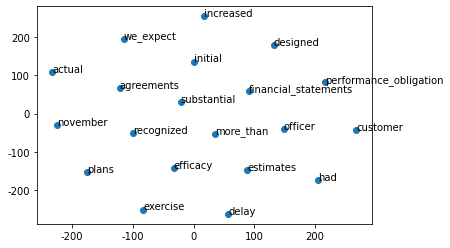

In [93]:
words_vector_tsne = TSNE(n_components=2).fit_transform(words_vector)  # from high dim to dim = 2

plt.figure()
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
# plt.rcParams['axes.unicode_minus'] = False
plt.scatter(words_vector_tsne[:, 0], words_vector_tsne[:, 1])
for i, vec in enumerate(words_vector_tsne):
    x, y = vec[0], vec[1]
    plt.text(x, y, words_name[i], size=10)
plt.show()  # see if similar words are close